In [1]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [17]:
year = 1924
dfStarsByBirthyear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfStarsByBirthyear.birthdate = dfStarsByBirthyear.birthdate.apply(lambda bd:date.fromisoformat(bd) if bd is not None else None)
dfStarsByBirthyear.set_index('id', inplace=True)
dfStarsByBirthyear

,name,birthdate
id,,
723058,Adrian Ricard,1924-01-01
242368,Al Dunlap,1924-01-01
750596,Al Ruscio,1924-01-01
321294,Aldo Giuffrè,1924-01-01
59091,Anne Barton,1924-01-01
...,...,...
447230,Warren J. Kemmerling,1924-01-01
9393,Werner Abrolat,1924-01-01
117252,William Bryant,1924-01-01


In [ ]:
title = input('Quel film voulez-vous ?').split()
# Gérer les espaces pour l'URL
s = '%20'
s = s.join(title)
# Lecture json
dfMoviesByTitle = pd.read_json(f'http://localhost:8000/movies/by_title_part?n={s}')
dfMoviesByTitle.set_index('id', inplace=True)
dfMoviesByTitle

In [5]:
min_count = 10

dfStatsMovieByActor = pd.read_json(f'http://localhost:8000/stars/stats_movie_by_actor?minc={min_count}')
dfStatsMovieByActor

,star,movie_count,first_movie_date,last_movie_date
0,John Wayne,172,1926,1976
1,Harrison Ford,86,1915,1932
2,Sean Connery,73,1954,2012
3,Sylvester Stallone,73,1969,2019
4,Tom Hanks,69,1980,2020
...,...,...,...,...
161,Patrick Wayne,10,1950,1971
162,Frank Welker,10,1981,2019
163,Grant Withers,10,1943,1955
164,Michael Fassbender,10,2001,2017


In [18]:
dfMovies = pd.read_json(f'http://localhost:8000/movies')
dfMovies = dfMovies[['year','title']]
dfMoviesByYear = dfMovies.groupby(by='year').count()
dfMoviesByYear.columns = pd.Index(['count_movies'], dtype='object')
dfMoviesByYear

,count_movies
year,
1915,1
1916,1
1917,7
1918,10
1919,10
...,...
2016,15
2017,22
2018,20


In [8]:
dfStars = pd.read_json(f'http://localhost:8000/stars')
dfStars.birthdate = dfStars.birthdate.apply(lambda bd:date.fromisoformat(bd) if bd is not None else None)
dfStars = dfStars[~dfStars['birthdate'].isna()]
dfStars['birthyear'] = pd.to_datetime(dfStars['birthdate']).dt.year
dfStarsByYear = dfStars[['name','birthyear']]
dfStarsByYear = dfStarsByYear.groupby(by='birthyear').count()
dfStarsByYear.columns = pd.Index(['count_stars'], dtype='object')

(1910.0, 2025.0)

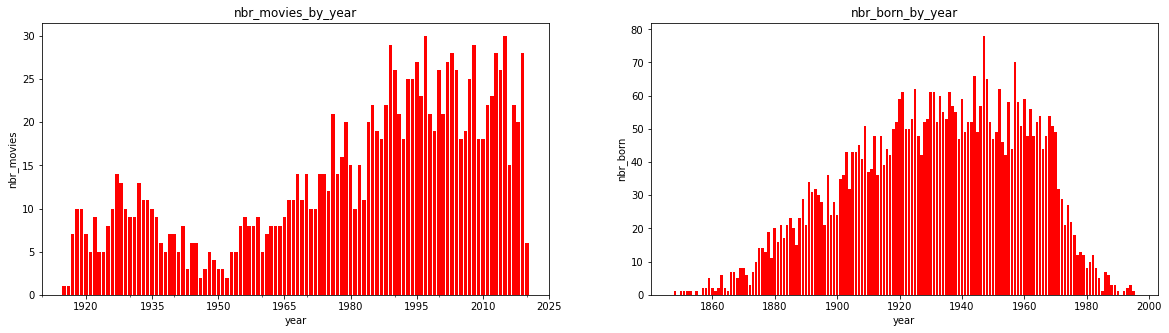

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.bar(dfMoviesByYear.index, dfMoviesByYear.count_movies, color='red')
ax1.set_xlabel('year')
ax1.set_ylabel('nbr_movies')
ax1.set_title('nbr_movies_by_year')
ax1.set_xlim(1850,2025)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.bar(dfStarsByYear.index, dfStarsByYear.count_stars, color='red')
ax2.set_xlabel('year')
ax2.set_ylabel('nbr_born')
ax2.set_title("nbr_born_by_year")
ax1.set_xlim(1910,2025)

In [11]:
Top10 = dfStatsMovieByActor.sort_values(['movie_count'], ascending=False).head(10)
Top10 = Top10.set_index('star')

(1900.0, 2025.0)

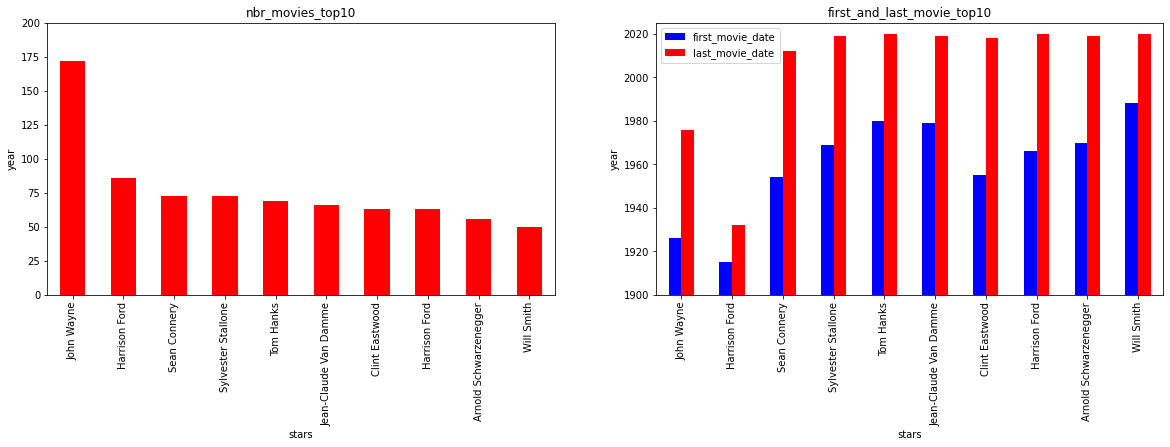

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

Top10.movie_count.plot(kind='bar', ax=ax1, color='red')
ax1.set_xlabel('stars')
ax1.set_ylabel('year')
ax1.set_title('nbr_movies_top10')
ax1.set_ylim(0,200)


Top10.plot(y=['first_movie_date', 'last_movie_date'], kind='bar', ax=ax2, color=['blue', 'red'])
ax2.set_xlabel('stars')
ax2.set_ylabel('year')
ax2.set_title("first_and_last_movie_top10")
ax2.set_ylim(1900,2025)